In [1]:
### Imports
%load_ext autoreload
%autoreload 2

# Append main folder
import sys
sys.path.append("../..")

import nidn
import torch

11:58:17|NIDN-INFO| Initialized NIDN for cpu
11:58:17|NIDN-INFO| Using double precision


In [2]:
# Start with the default config
cfg = nidn.load_default_cfg()

# Uniform Titanium-Dioxide Comparison With Experimental Data

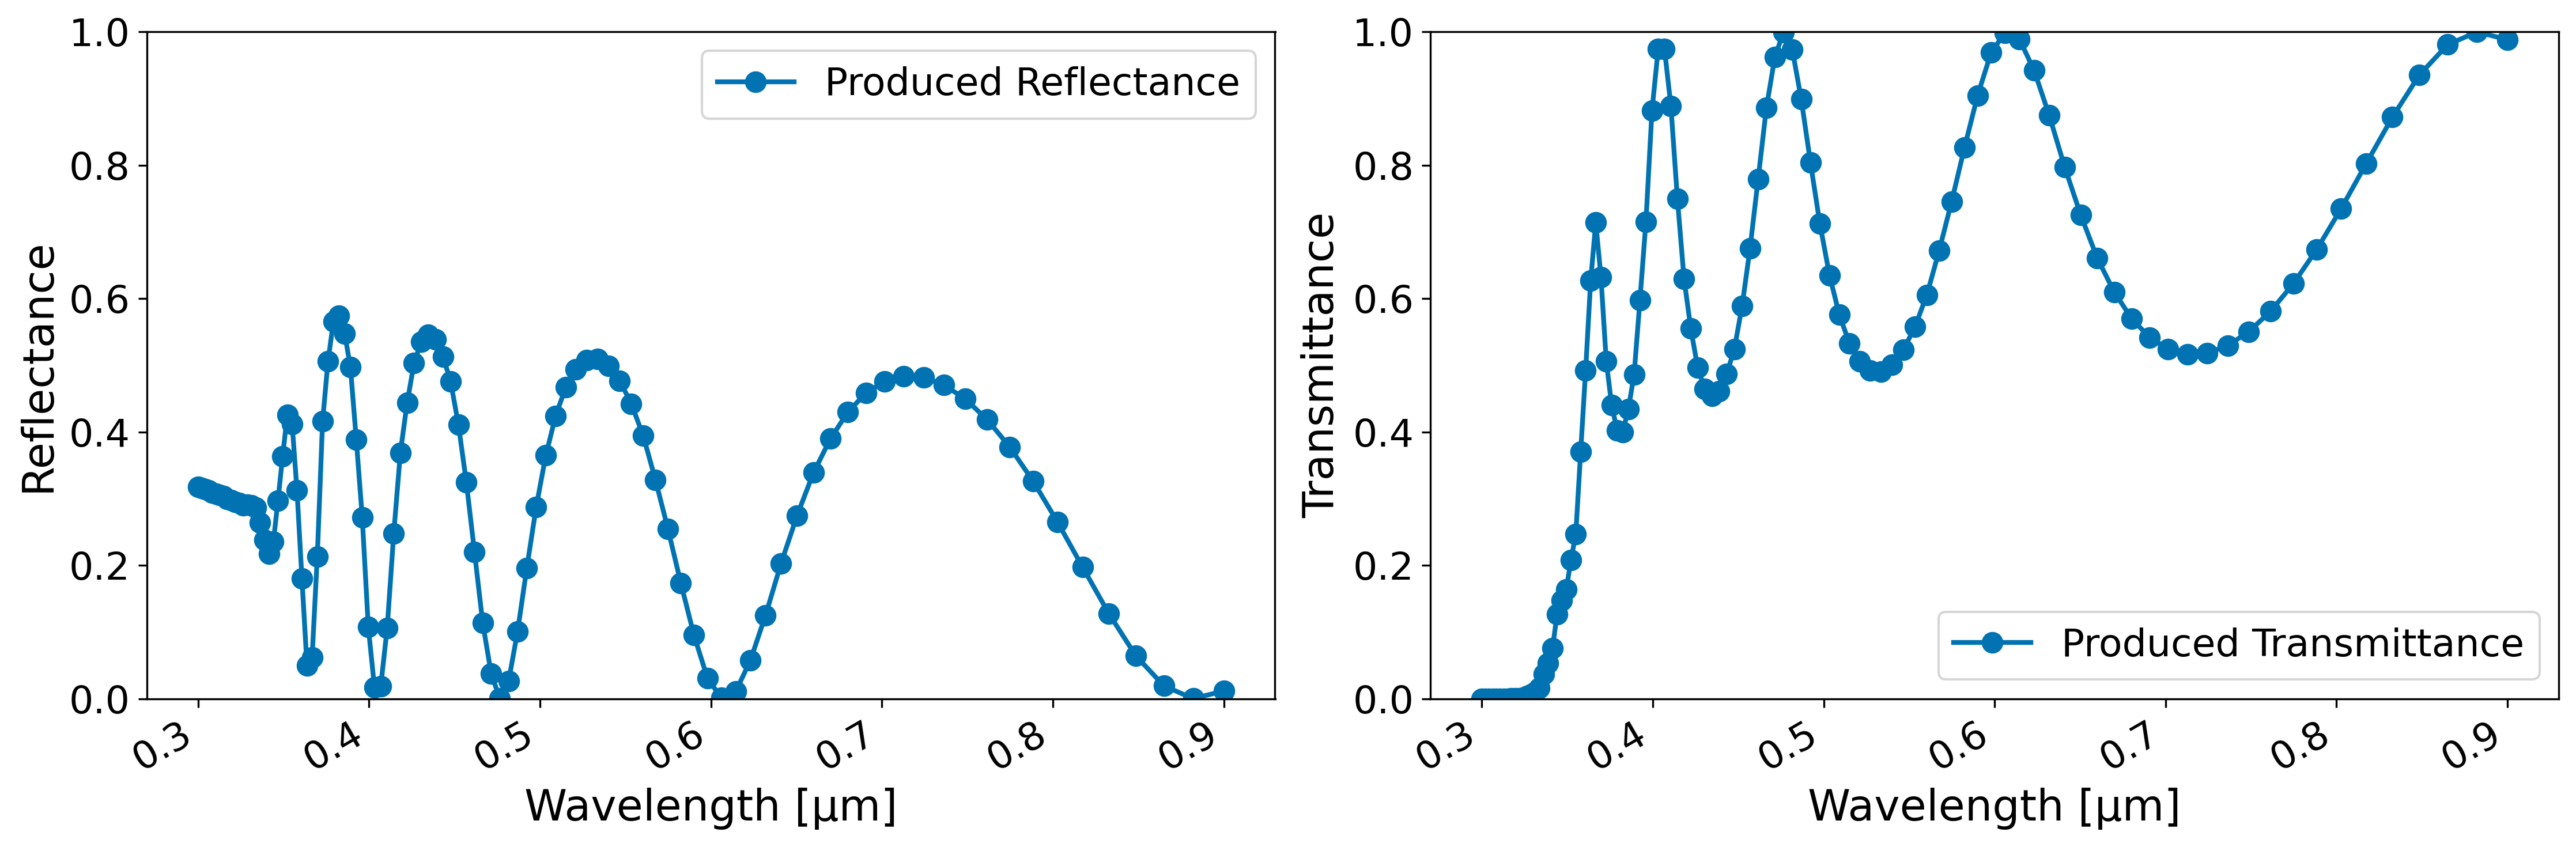

In [16]:
cfg = nidn.load_default_cfg()
# Set the number of frequencies to simulate for
cfg.N_freq = 100
#Number of layers with materials
cfg.N_layers = 1
# Define the thickness of the layer to be 380 nm
cfg.PER_LAYER_THICKNESS=[0.38]
#Set wavelength range to be 300 nm to 900 nm
cfg.physical_wavelength_range[0]=3e-7
cfg.physical_wavelength_range[1]=9e-7
# Determine target frequencies (in TRCWA units)
cfg.target_frequencies = nidn.compute_target_frequencies(
    cfg.physical_wavelength_range[0],
    cfg.physical_wavelength_range[1],
    cfg.N_freq,
    cfg.freq_distribution
)
# Init eps_grid
eps_grid = torch.zeros(cfg.Nx,cfg.Ny,cfg.N_layers,cfg.N_freq,dtype=torch.cfloat)

layer_builder = nidn.LayerBuilder(cfg)
eps_grid[:,:,0,:] = layer_builder.build_uniform_layer("titanium_oxide")
# Compute spectrum for this configuration
R,T = nidn.compute_spectrum(eps_grid,cfg)
nidn.plot_spectrum(cfg,R,T)

## Uniform Titanium-Oxide Ground Truth

In [3]:
# Titanium Oxide Uniform
# Set grid specifics
cfg.Nx = 1
cfg.Ny = 1
cfg.N_layers = 1
cfg.N_freq = 50
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.TRCWA_NG = 11
cfg.PER_LAYER_THICKNESS = [1.0]
cfg.freq_distribution = "log"

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 2e-6
cfg.physical_wavelength_range[1] = 1e-5

# Determine target frequencies (in TRCWA units)
cfg.target_frequencies = nidn.compute_target_frequencies(
    cfg.physical_wavelength_range[0],
    cfg.physical_wavelength_range[1],
    cfg.N_freq,
    cfg.freq_distribution
)

In [4]:
# Init eps_grid
eps_grid = torch.zeros(cfg.Nx,cfg.Ny,cfg.N_layers,cfg.N_freq,dtype=torch.cfloat)

layer_builder = nidn.LayerBuilder(cfg)
eps_grid[:,:,0,:] = layer_builder.build_uniform_layer("titanium_oxide")

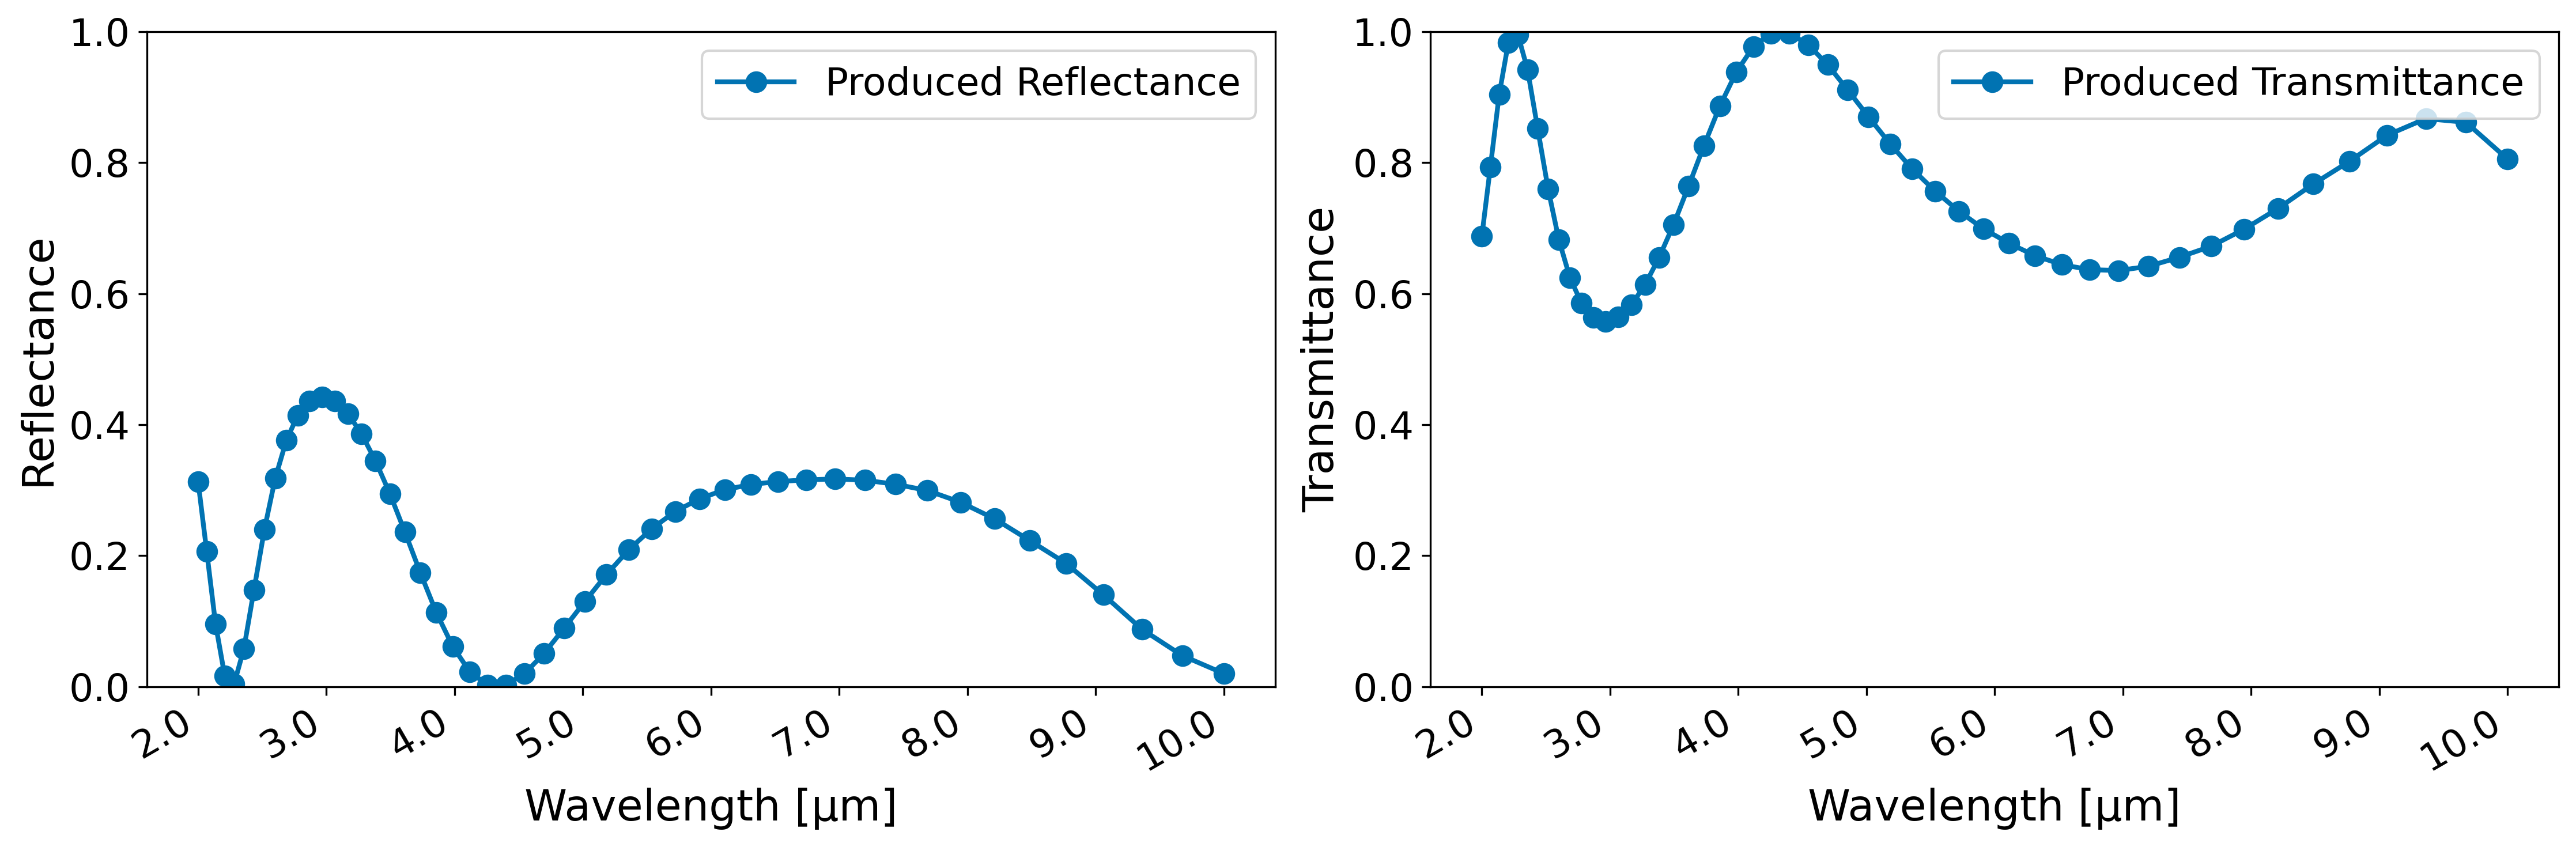

In [5]:
# Compute spectrum for this configuration
R,T = nidn.compute_spectrum(eps_grid,cfg)
nidn.plot_spectrum(cfg,R,T)

In [6]:
print("cfg.target_reflectance_spectrum = [", end="")
[print(f"{r.item():.8f}",end=",") for r in R]
print("]")
print("cfg.target_transmittance_spectrum = [",end="")
[print(f"{t.item():.8f}",end=",") for t in T]
print("]")

cfg.target_reflectance_spectrum = [0.01990215,0.04728071,0.08716609,0.13999258,0.18830960,0.22315259,0.25630232,0.28152192,0.29933946,0.30892036,0.31509786,0.31710336,0.31556279,0.31309837,0.30863096,0.30071653,0.28684941,0.26730741,0.24081118,0.20858054,0.17094725,0.12999624,0.08915847,0.05051830,0.01976309,0.00227082,0.00242139,0.02239073,0.06111604,0.11309443,0.17386812,0.23612637,0.29457018,0.34478804,0.38628227,0.41693407,0.43564378,0.44249644,0.43594932,0.41444401,0.37586218,0.31787402,0.23989091,0.14770234,0.05799381,0.00398777,0.01661932,0.09557429,0.20664216,0.31245563,]
cfg.target_transmittance_spectrum = [0.80566155,0.86160385,0.86728087,0.84190447,0.80215258,0.76732824,0.73015897,0.69836191,0.67238730,0.65553712,0.64175282,0.63528599,0.63663443,0.64418210,0.65811991,0.67710729,0.69911350,0.72590540,0.75649485,0.79033701,0.82874515,0.86990899,0.91078512,0.94943171,0.98018489,0.99767452,0.99752190,0.97755126,0.93882552,0.88684743,0.82607457,0.76381737,0.70537459,0.65515751,0.

## Uniform 3-Layer Ground-truth 

In [7]:
# Start with the default config
cfg = nidn.load_default_cfg()

# Set grid specifics
cfg.Nx = 1
cfg.Ny = 1
cfg.N_layers = 3
cfg.N_freq = 32
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.TRCWA_NG = 11
cfg.PER_LAYER_THICKNESS = [1.0]
cfg.freq_distribution = "linear"

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 1e-5
cfg.physical_wavelength_range[1] = 4e-5

# Determine target frequencies (in TRCWA units)
cfg.target_frequencies = nidn.compute_target_frequencies(
    cfg.physical_wavelength_range[0],
    cfg.physical_wavelength_range[1],
    cfg.N_freq,
    cfg.freq_distribution
)

In [8]:
# Init eps_grid
eps_grid = torch.zeros(cfg.Nx,cfg.Ny,cfg.N_layers,cfg.N_freq,dtype=torch.cfloat)

layer_builder = nidn.LayerBuilder(cfg)
eps_grid[:,:,0,:] = layer_builder.build_uniform_layer("titanium_oxide")
eps_grid[:,:,1,:] = layer_builder.build_uniform_layer("germanium")
eps_grid[:,:,2,:] = layer_builder.build_uniform_layer("tantalum_pentoxide")

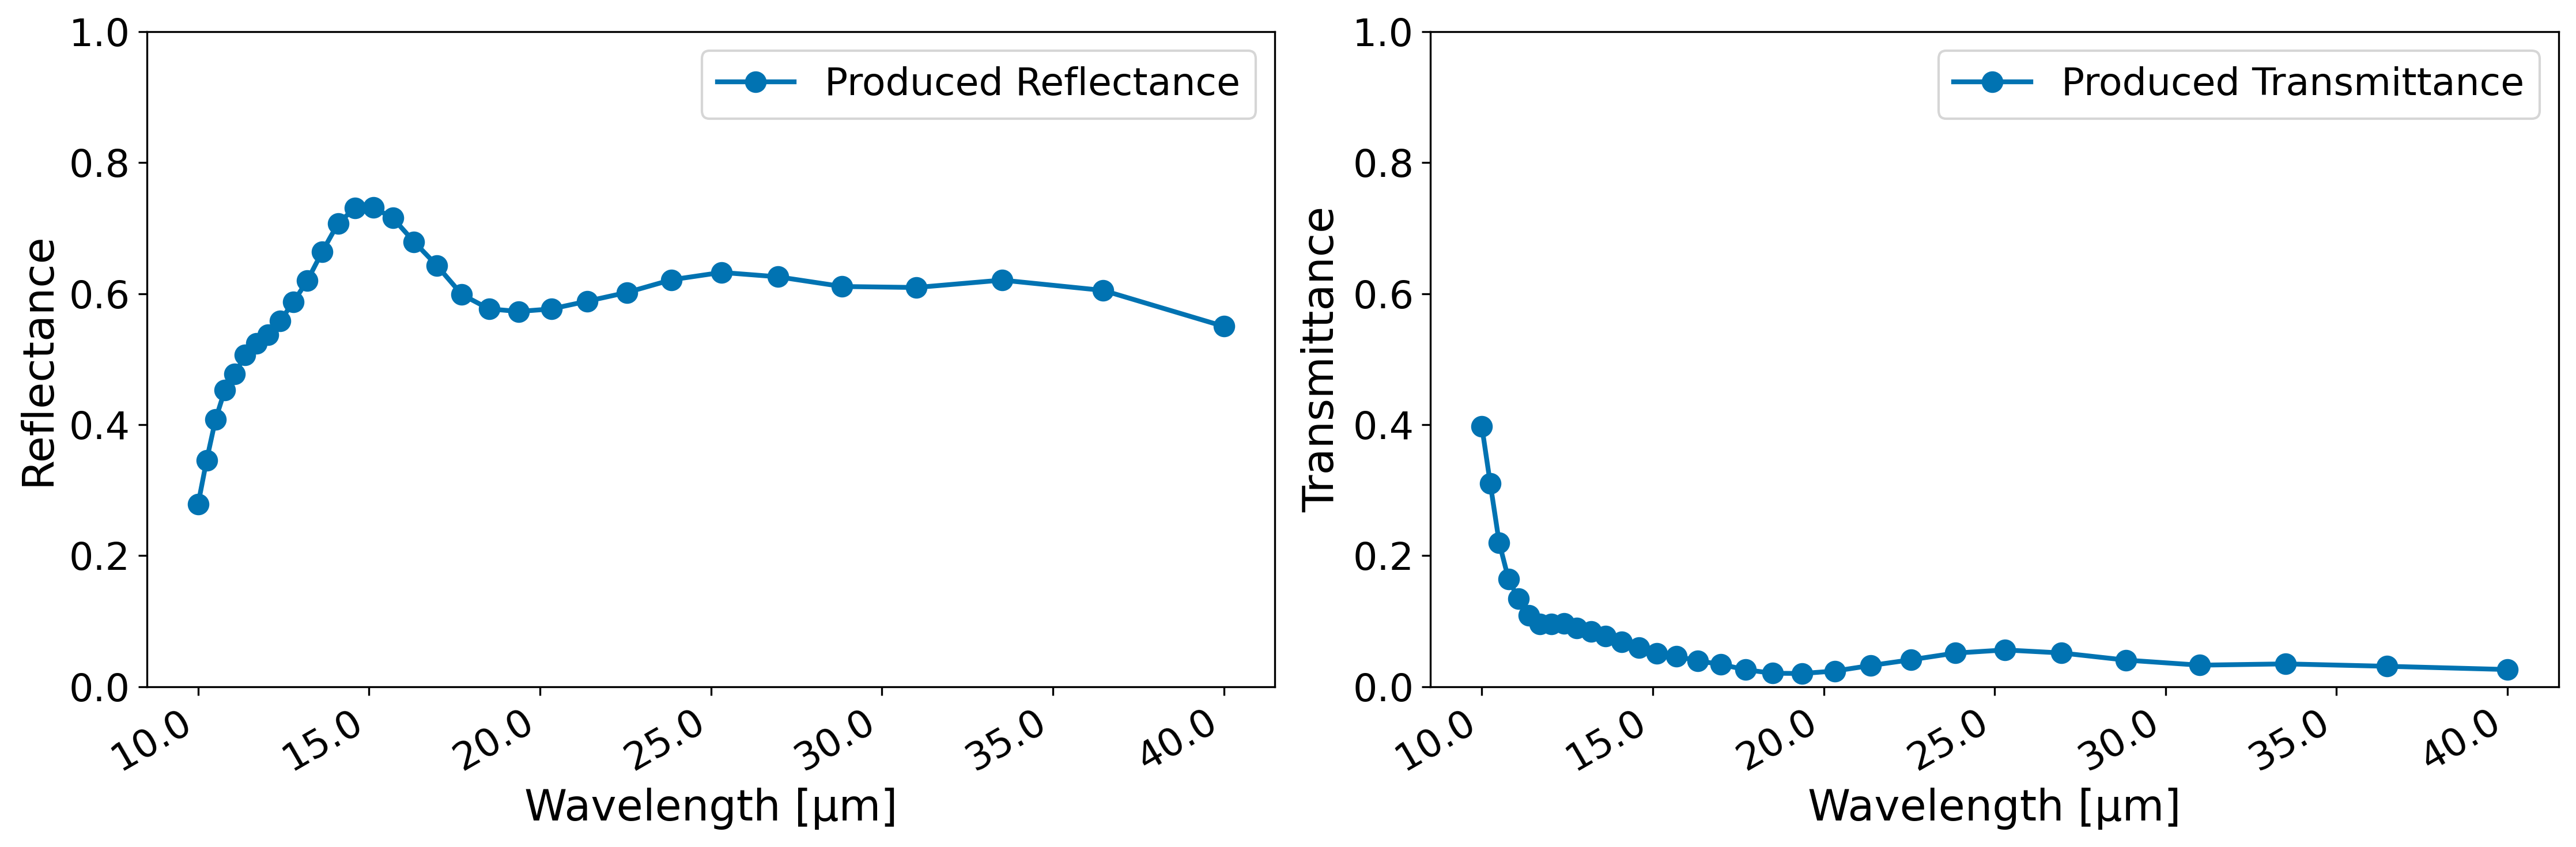

In [9]:
# Compute spectrum for this configuration
R,T = nidn.compute_spectrum(eps_grid,cfg)
nidn.plot_spectrum(cfg,R,T)

In [10]:
print("cfg.target_reflectance_spectrum = [", end="")
[print(f"{r.item():.8f}",end=",") for r in R]
print("]")
print("cfg.target_transmittance_spectrum = [",end="")
[print(f"{t.item():.8f}",end=",") for t in T]
print("]")

cfg.target_reflectance_spectrum = [0.55005782,0.60496502,0.62066166,0.60937998,0.61091496,0.62573035,0.63239681,0.62117495,0.60183070,0.58843758,0.57659786,0.57282597,0.57672235,0.59860364,0.64276949,0.67916063,0.71551643,0.73145107,0.73085603,0.70710124,0.66371328,0.61967796,0.58697495,0.55837736,0.53705611,0.52416312,0.50597608,0.47726774,0.45294034,0.40777731,0.34554019,0.27880253,]
cfg.target_transmittance_spectrum = [0.02601471,0.03096245,0.03463690,0.03266956,0.04043108,0.05131611,0.05590518,0.05112020,0.04086629,0.03220691,0.02374713,0.01998344,0.02033119,0.02573320,0.03400531,0.03918298,0.04632213,0.05050779,0.05963449,0.06865844,0.07741967,0.08407922,0.08973443,0.09605149,0.09535432,0.09522754,0.10836393,0.13393469,0.16375927,0.21962809,0.30981320,0.39759293,]


## Patterned 2-Layer Ground-truth 

In [11]:
# Start with the default config
cfg = nidn.load_default_cfg()

# Set grid specifics
cfg.Nx = 9
cfg.Ny = 9
cfg.N_layers = 2
cfg.N_freq = 32
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.TRCWA_NG = 11
cfg.PER_LAYER_THICKNESS = [1.0]
cfg.freq_distribution = "linear"

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 8e-6
cfg.physical_wavelength_range[1] = 3e-5

# Determine target frequencies (in TRCWA units)
cfg.target_frequencies = nidn.compute_target_frequencies(
    cfg.physical_wavelength_range[0],
    cfg.physical_wavelength_range[1],
    cfg.N_freq,
    cfg.freq_distribution
)

In [12]:
# Init eps_grid
eps_grid = torch.zeros(cfg.Nx,cfg.Ny,cfg.N_layers,cfg.N_freq,dtype=torch.cfloat)

layer_builder = nidn.LayerBuilder(cfg)
eps_grid[:,:,0,:] = layer_builder.build_squared_layer("titanium_oxide","germanium")
eps_grid[:,:,1,:] = layer_builder.build_squared_layer("germanium","titanium_oxide")

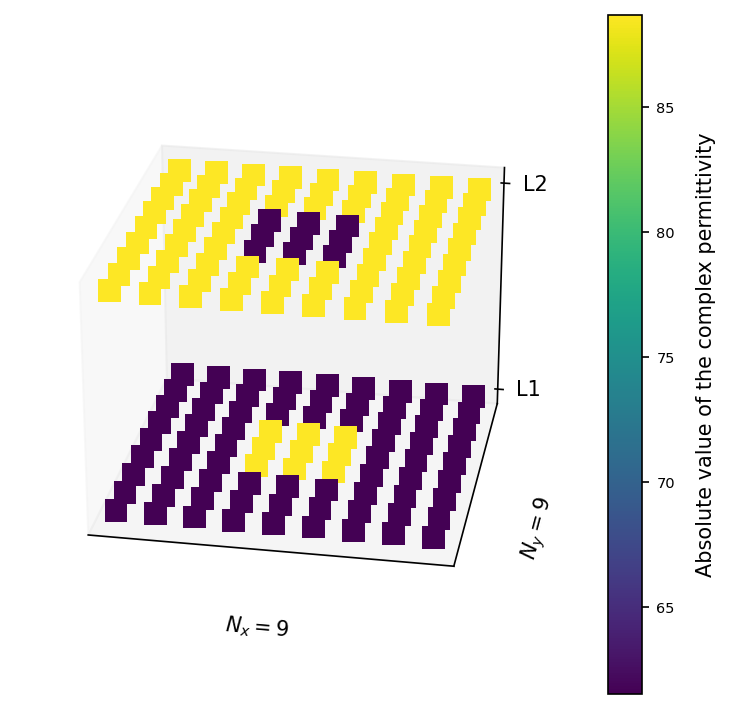

In [13]:
nidn.plot_epsilon_grid(eps_grid,cfg)

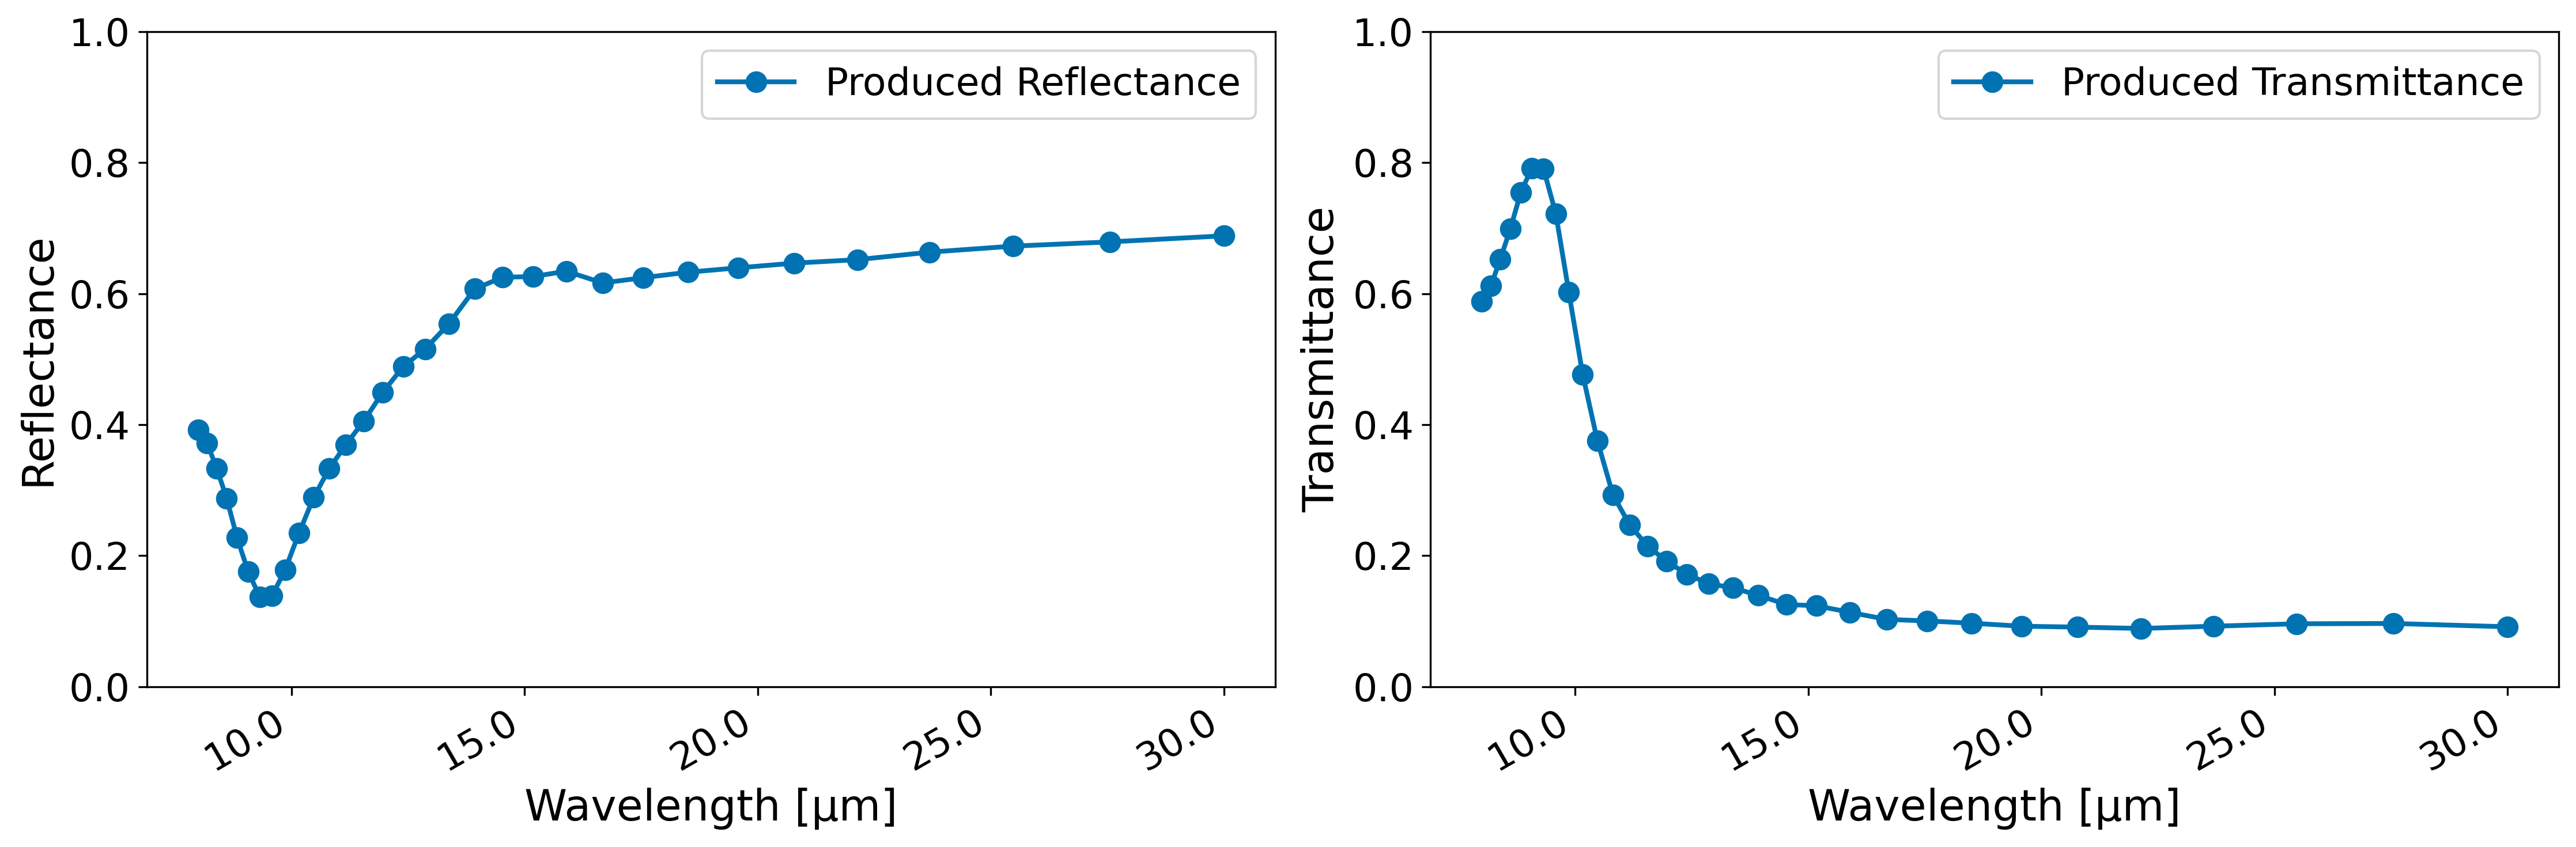

In [14]:
# Compute spectrum for this configuration
R,T = nidn.compute_spectrum(eps_grid,cfg)
nidn.plot_spectrum(cfg,R,T)

In [15]:
print("cfg.target_reflectance_spectrum = [", end="")
[print(f"{r.item():.8f}",end=",") for r in R]
print("]")
print("cfg.target_transmittance_spectrum = [",end="")
[print(f"{t.item():.8f}",end=",") for t in T]
print("]")

cfg.target_reflectance_spectrum = [0.68828081,0.67902203,0.67254449,0.66336273,0.65189523,0.64654359,0.63939401,0.63271241,0.62439366,0.61628131,0.63422217,0.62606380,0.62500825,0.60722824,0.55416427,0.51557739,0.48864278,0.44927543,0.40555089,0.36949881,0.33302381,0.28887292,0.23453777,0.17855517,0.13872936,0.13701113,0.17538042,0.22712094,0.28762694,0.33341107,0.37140055,0.39226625,]
cfg.target_transmittance_spectrum = [0.09127810,0.09634265,0.09588768,0.09216599,0.08871714,0.09077894,0.09216121,0.09673880,0.10026712,0.10257377,0.11336114,0.12332778,0.12537304,0.13925786,0.15096161,0.15686451,0.17153857,0.19164363,0.21466734,0.24704620,0.29248742,0.37537087,0.47662882,0.60192663,0.72188167,0.79082127,0.79187421,0.75442068,0.69888141,0.65274581,0.61179944,0.58826904,]
